#### About Dataset
###### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

##### Content
###### Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* Shape

In [4]:
data.shape

(1025, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* Missing values

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


No missing values

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


######  Correlation

In [10]:
corr_matrix = data.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


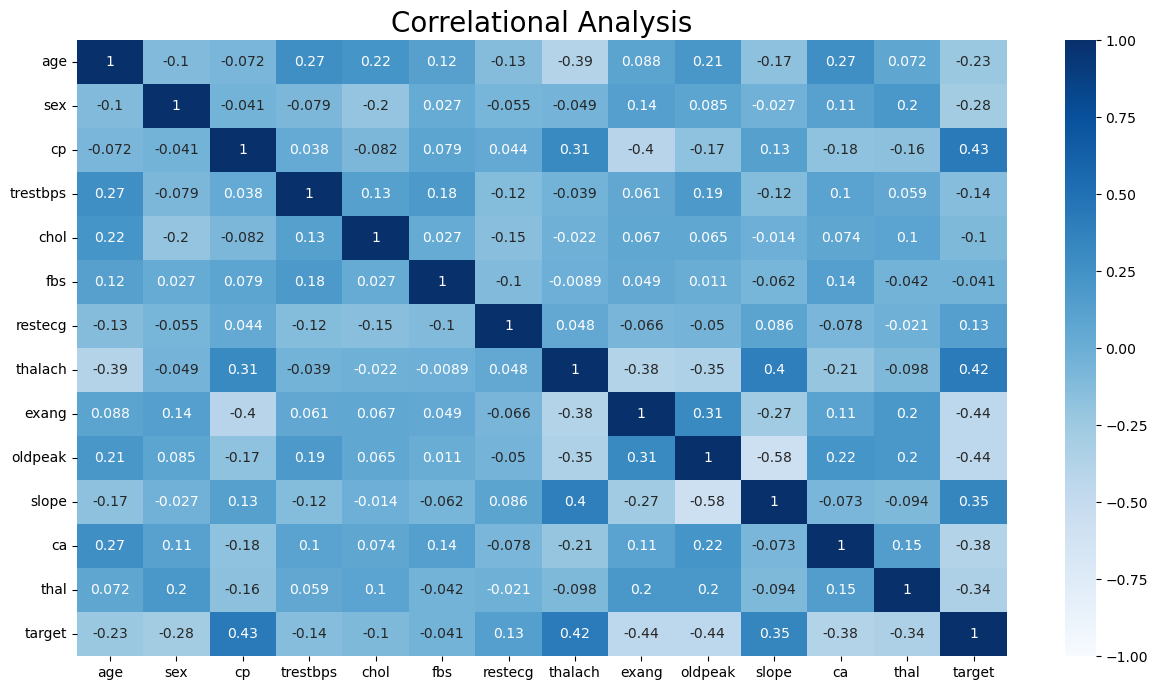

In [11]:
plt.figure(figsize = (15,8))
plt.title("Correlational Analysis", size = 20)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot = True, cmap='Blues')
plt.show()

In [12]:
data.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

* Standardization

In [13]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
#transforming the column
data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']] = scaler.fit_transform(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0


######  Handling Imbalance data

In [16]:
target_count = data['target'].value_counts()
target_count

target
1    526
0    499
Name: count, dtype: int64

* The data is not balance

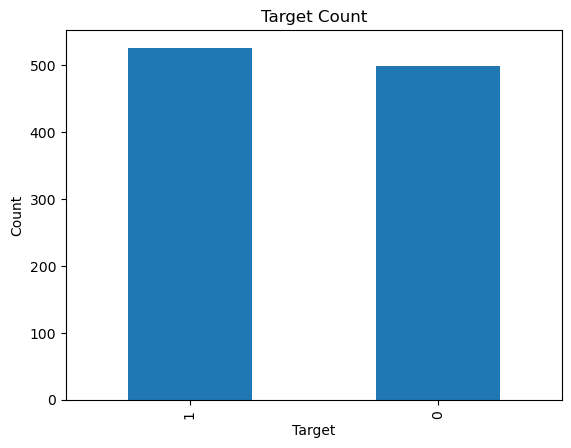

In [17]:
target_count.plot(kind='bar')
plt.title('Target Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

###### Using Oversampling

In [18]:
x = data.drop(['target'],axis=1)
y = data['target']

In [19]:
x.shape

(1025, 13)

In [20]:
y.shape

(1025,)

In [21]:
from imblearn.over_sampling import SMOTE


In [22]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [23]:
x_res.shape

(1052, 13)

In [24]:
y_res.shape

(1052,)

In [25]:
y_res.value_counts()

target
0    526
1    526
Name: count, dtype: int64

Imbalcance resolved

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42)

######  Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

###### Scoring the model

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [29]:
y_pred1 = log.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.8388625592417062

In [ ]:
precision_score(y_test,y_pred1)

In [ ]:
recall_score(y_test,y_pred1)

In [ ]:
f1_score(y_test,y_pred1)

######  Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

In [ ]:
y_pred2 = dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

In [ ]:
precision_score(y_test,y_pred2)

In [ ]:
recall_score(y_test,y_pred2)

In [ ]:
f1_score(y_test,y_pred2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
y_pred3 = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

In [ ]:
precision_score(y_test,y_pred3)

In [ ]:
f1_score(y_test, y_pred3)

In [ ]:
recall_score(y_test,y_pred3)

######  Visualization

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
             "ACC":[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100,
                   ]})

In [ ]:
final_data

In [ ]:
final_data_prec = pd.DataFrame({'Models':['LR','DT','RF'],
             "PRE":[precision_score(y_test,y_pred1)*100,
                    precision_score(y_test,y_pred2)*100,
                    precision_score(y_test,y_pred3)*100,
                   ]})

In [ ]:
final_data_prec

In [ ]:
final_data_re = pd.DataFrame({'Models':['LR','DT','RF'],
             "Recall":[recall_score(y_test,y_pred1)*100,
                    recall_score(y_test,y_pred2)*100,
                    recall_score(y_test,y_pred3)*100,
                   ]})

In [ ]:
final_data_re

In [ ]:
final_data_F1 = pd.DataFrame({'Models':['LR','DT','RF'],
             "F1":[f1_score(y_test,y_pred1)*100,
                    f1_score(y_test,y_pred2)*100,
                    f1_score(y_test,y_pred3)*100,
                   ]})

In [ ]:
final_data_F1

* From the above, both the decisionTreeClassifier and the RandomForestClassifier the best.
But in this project,i wll use the DecisionTreeClassifier model, this is because i am using a smaller dataset.

######  Using DecisionTreeClassifier Model

In [ ]:
#train the model in the whole dataset
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

###### Save The Model 

In [ ]:
#Import library
import joblib

In [ ]:
#save the model
joblib.dump(DT,'Heart Disease detector')

In [ ]:
model = joblib.load('Heart Disease detector')

In [ ]:
prediction = model.predict([[1,0,1,1,1,1,0,0,1,1,1,1,1]])

In [ ]:
if prediction==0:
    print("No Disease")
else:
        print("Disease")